In [1]:
"""
Randomized Optimization - Part 1

https://gatech.instructure.com/courses/122126/assignments/557950

"""
#1 Verify imports
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import mlrose_hiive as mlrose
import numpy as np
import random
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import time

# Allow plots to appear within the notebook:
%matplotlib inline

print("All imports are good")

All imports are good


In [2]:
# Algorithms and support functions
def rhc(problem, init_state):
    # Copied from here:
    #https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.random_hill_climb
    restarts_range = [10, 20, 40]
    start = time.time()
    for restarts in restarts_range:
        _, _, fitness_curve = mlrose.random_hill_climb(problem, restarts=restarts, \
                     max_iters = 2*len(init_state), init_state = init_state, random_state = 1, curve=True)
        
        iterations = []
        for i in range(len(fitness_curve)): iterations.append(i)
    
        plt.plot(fitness_curve, iterations)
        plt.title("Randomized Hill Climbing - problem size " + str(problem.length))
        plt.xlabel("Fitness - Restarts: " + str(restarts))
        plt.ylabel("Iterations")
        plt.show()
    end = time.time()
    print("Done in " + getTime(end - start))
        
def sa(problem, init_state):
    # Copied from here:
    #https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.simulated_annealing
    schedules = [mlrose.GeomDecay(), mlrose.ArithDecay(), mlrose.ExpDecay()]
    schedule_names = ["GeomDecay", "ArithDecay", "ExpDecay"]
    schedule_index = 0
    start = time.time()
    for schedule in schedules:
        _, _, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, \
                     max_iters=2*len(init_state), init_state=init_state, random_state=1, curve=True)
    
        iterations = []
        for i in range(len(fitness_curve)): iterations.append(i)
    
        plt.plot(fitness_curve, iterations)
        plt.title("Simulated Annealing - problem size " + str(problem.length))
        plt.xlabel("Fitness - " + schedule_names[schedule_index])
        plt.ylabel("Iterations")
        plt.show()
        
        schedule_index += 1
    end = time.time()
    print("Done in " + getTime(end - start))

def ga(problem):
    # Copied from here:
    #https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.genetic_alg
    mutation_probs=[0.2, 0.4]
    start = time.time()
    for mutation_prob in mutation_probs:
        _, _, fitness_curve = mlrose.genetic_alg(problem, \
                 mutation_prob=mutation_prob, curve=True, random_state=1)
        iterations = []
        for i in range(len(fitness_curve)): iterations.append(i)

        plt.plot(fitness_curve, iterations)
        plt.title("Genetic Algorithm - problem size " + str(problem.length))
        plt.xlabel("Fitness - mutation_prob: " + str(mutation_prob))
        plt.ylabel("Iterations (Mutations)")
        plt.show()
    end = time.time()
    print("Done in " + getTime(end - start))

def mimic(problem):
    # Copied from here:
    #https://mlrose.readthedocs.io/en/stable/source/algorithms.html#mlrose.algorithms.mimic
    pop_sizes = [100, 200, 300]
    start = time.time()
    for pop_size in pop_sizes:
        _, _, fitness_curve = mlrose.mimic(problem, pop_size=pop_size, curve=True, random_state=1)
        #no fast_mimic parameter
        
        iterations = []
        for i in range(len(fitness_curve)): iterations.append(i)

        plt.plot(fitness_curve, iterations)
        plt.title("MIMIC - problem size " + str(problem.length))
        plt.xlabel("Fitness - pop_size: " + str(pop_size))
        plt.ylabel("Iterations")
        plt.show()
    end = time.time()
    print("Done in " + getTime(end - start))

def getTime(seconds):
    if int(seconds / 60) == 0:
        if int(seconds) == 0:
            return str(round(seconds,3)) + " seconds"
        return str(int(seconds)) + " second(s)"
    minutes = int(seconds / 60)
    seconds = int(seconds % 60)
    if int(minutes / 60) == 0:
        return str(minutes) + " minute(s) and " + str(seconds) + " second(s)"
    hours = int(minutes / 60)
    minutes = int(minutes % 60)
    # Assuming this won't be called for any time span greater than 24 hours
    return str(hours) + " hour(s), " + str(minutes) + " minute(s), and " + str(seconds) + " second(s)"

print("Algorithms and support functions defined")

Algorithms and support functions defined


In [3]:
# Three optimization problems:

#A
def FourPeaks():
    fitness = mlrose.FourPeaks()

    init_state_arrays = [[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
               [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
               [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]]
    for init_state_array in init_state_arrays:
        init_state = np.array(init_state_array)
        problem = mlrose.DiscreteOpt(length=len(init_state), fitness_fn=fitness, maximize=True, max_val=2)

        rhc(problem, init_state)
        sa(problem, init_state)
        ga(problem)
        mimic(problem)

#B
def Knapsack():
    weights_arrays = [[10, 5, 2, 8, 15, 10, 5, 2, 8, 15],
        [10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15],
        [10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15, 10, 5, 2, 8, 15]]
    for weights in weights_arrays:
        values = range(1,len(weights)+1)
        fitness = mlrose.Knapsack(weights, values)
        init_state = np.array(values)
        problem = mlrose.DiscreteOpt(length=len(init_state), fitness_fn=fitness, maximize=True, \
                                     max_val=2)

        rhc(problem, init_state)
        sa(problem, init_state)
        ga(problem)
        mimic(problem)

#C
def MaxKColor():
    edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
    fitness = mlrose.MaxKColor(edges)
    init_state_arrays = [[0, 1, 0, 1, 1],
                        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
                        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]]
    for init_state_array in init_state_arrays:
        init_state = np.array(init_state_array)
        problem = mlrose.DiscreteOpt(length=len(init_state), fitness_fn=fitness, maximize=True, \
                                     max_val=len(init_state_array))

        rhc(problem, init_state)
        sa(problem, init_state)
        ga(problem)
        mimic(problem)


print("Optimization problems defined")

Optimization problems defined


Exploring FourPeaks optimization problem


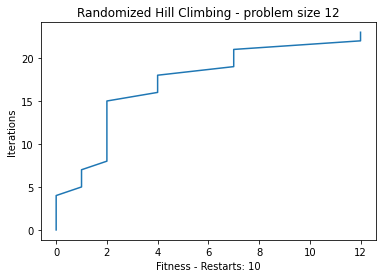

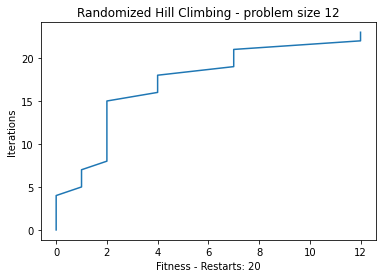

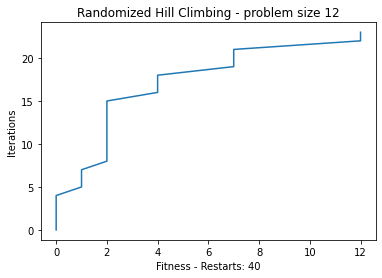

Done in 0.675 seconds


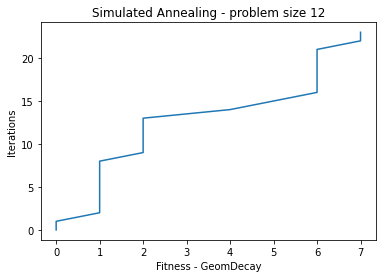

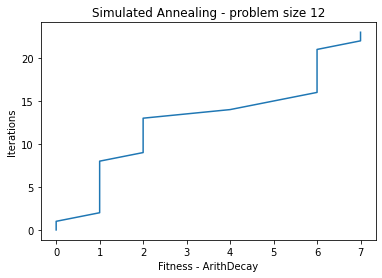

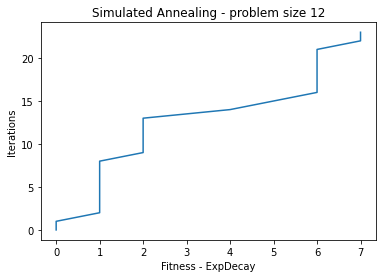

Done in 0.659 seconds


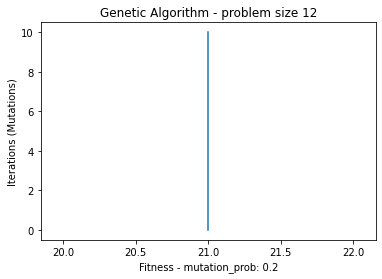

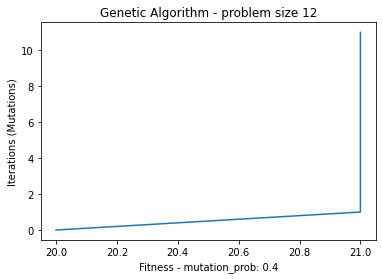

Done in 1 second(s)


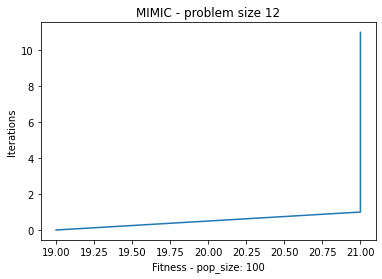

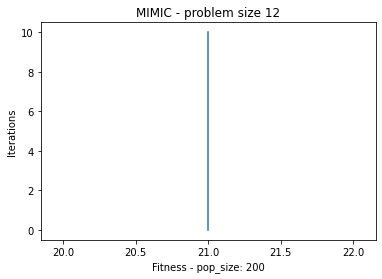

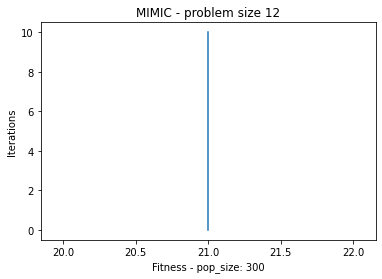

Done in 3 second(s)


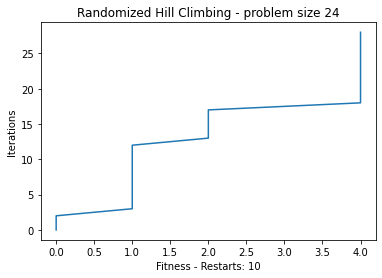

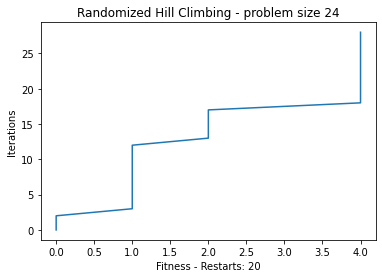

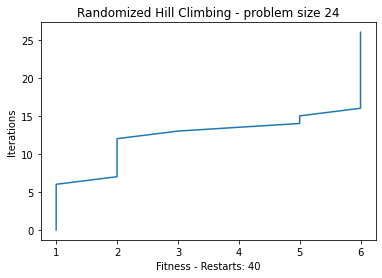

Done in 0.683 seconds


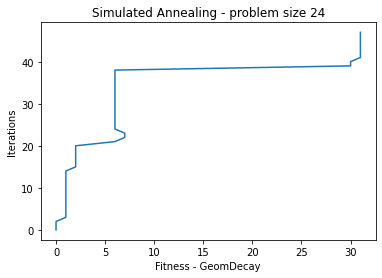

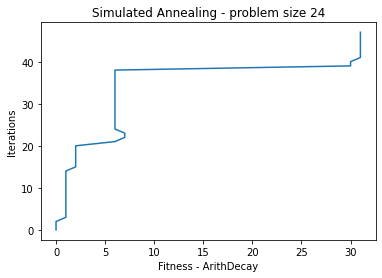

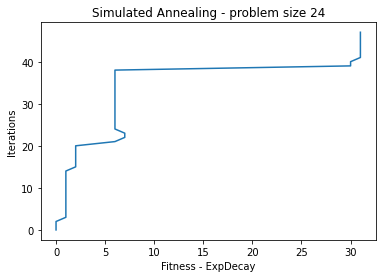

Done in 0.587 seconds


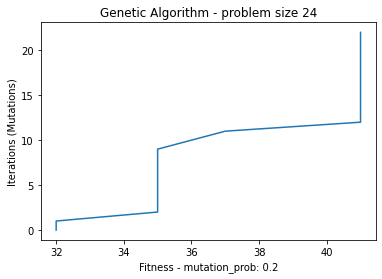

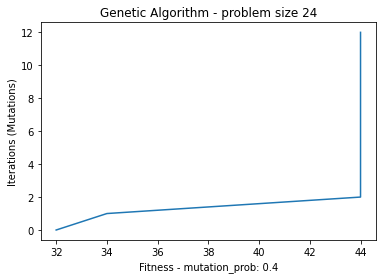

Done in 1 second(s)


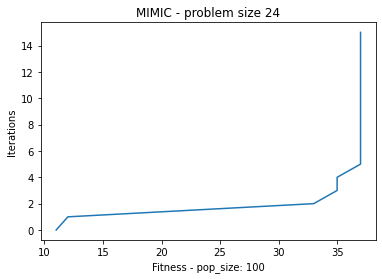

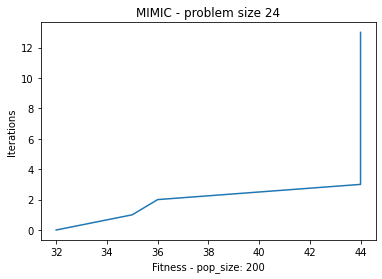

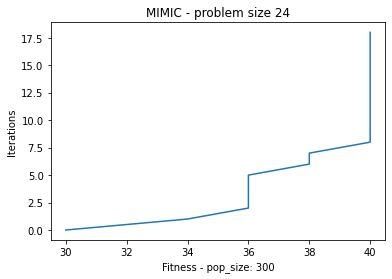

Done in 18 second(s)


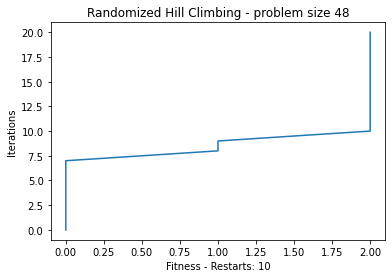

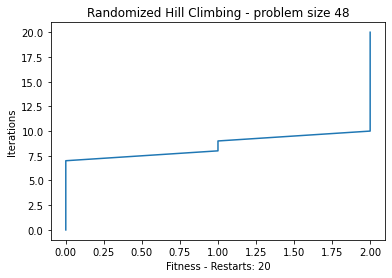

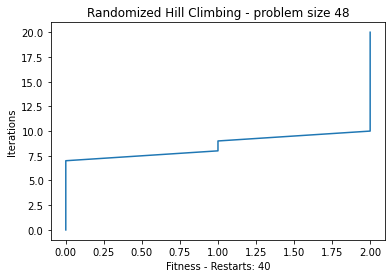

Done in 0.73 seconds


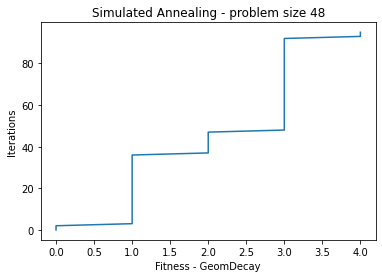

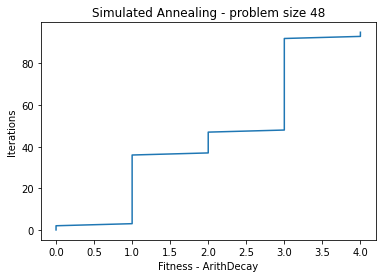

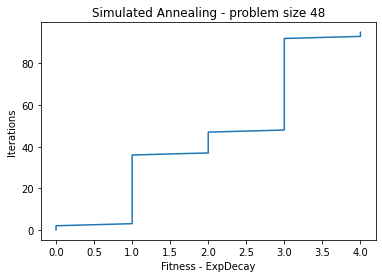

Done in 0.675 seconds


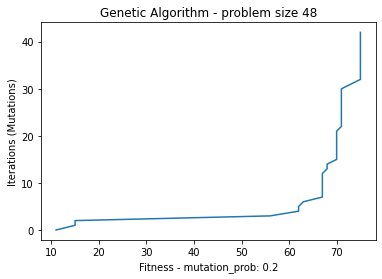

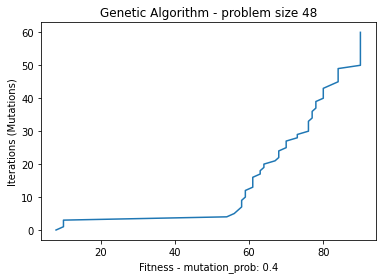

Done in 3 second(s)


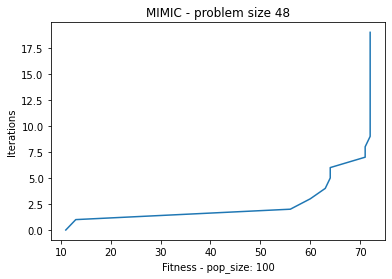

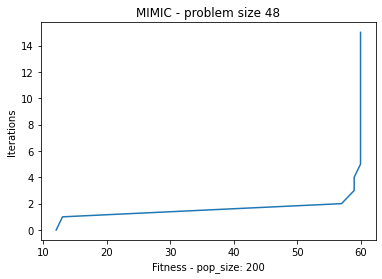

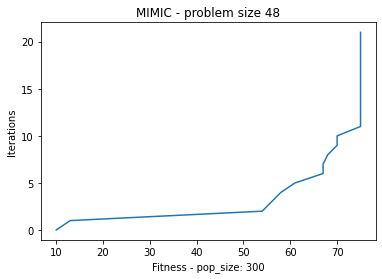

Done in 1 minute(s) and 25 second(s)


In [4]:
print("Exploring FourPeaks optimization problem") 
FourPeaks()

Exploring Max-k color optimization problem


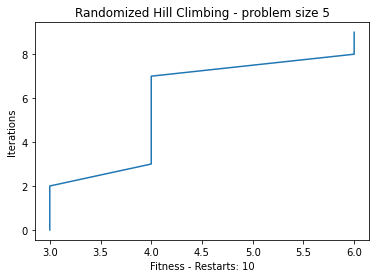

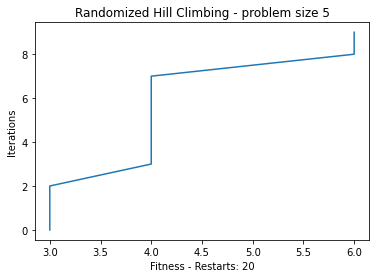

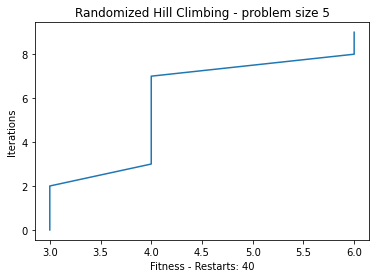

Done in 0.667 seconds


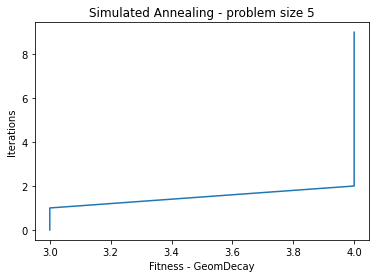

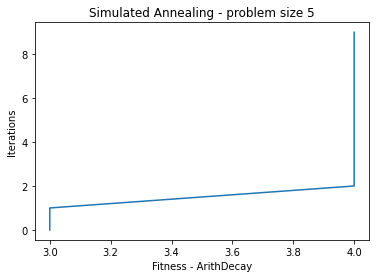

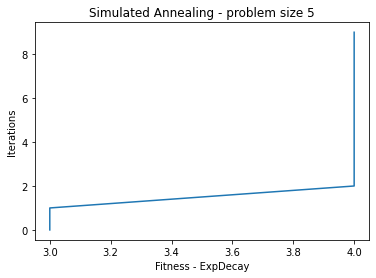

Done in 0.581 seconds


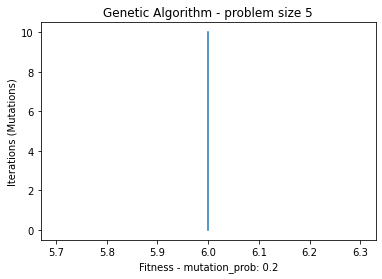

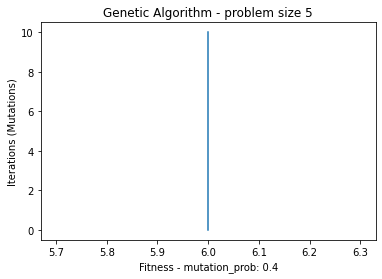

Done in 0.907 seconds


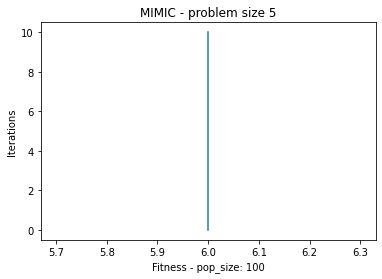

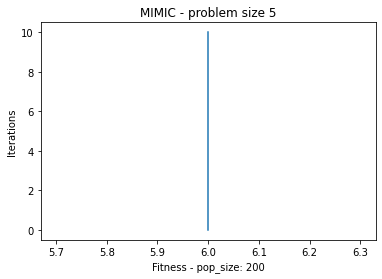

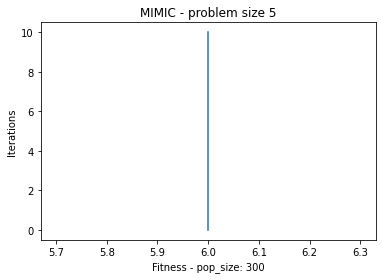

Done in 1 second(s)


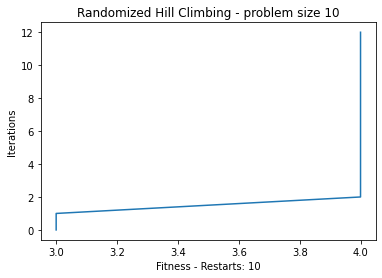

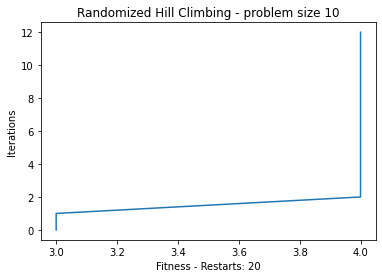

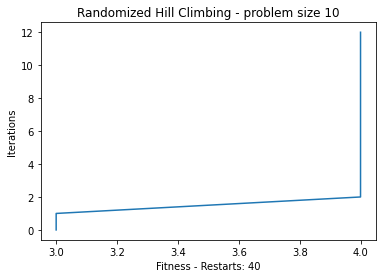

Done in 0.594 seconds


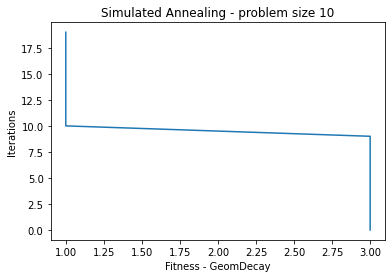

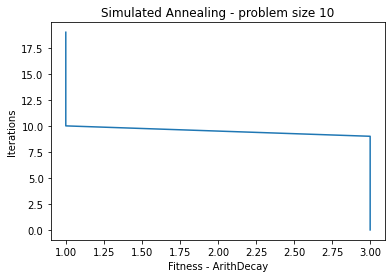

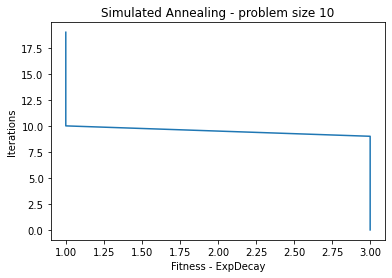

Done in 0.731 seconds


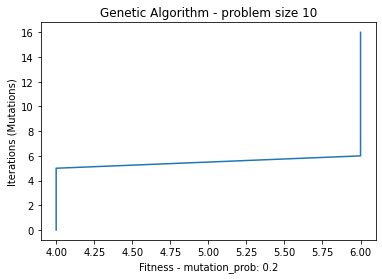

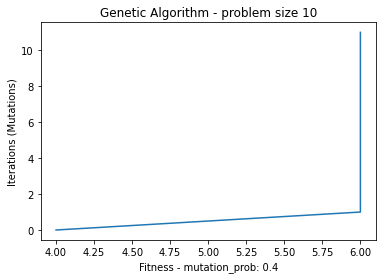

Done in 1 second(s)


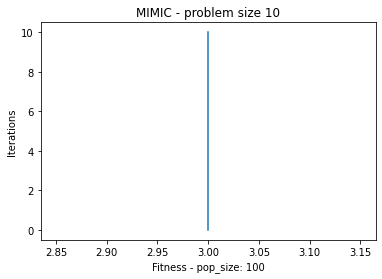

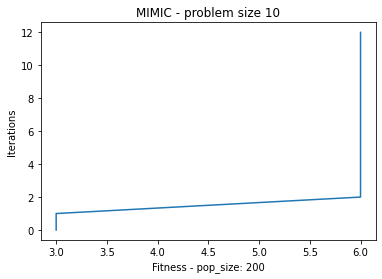

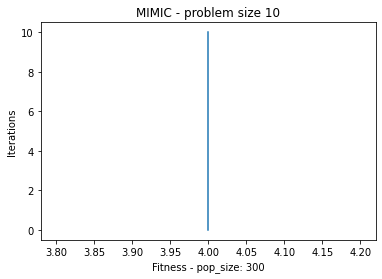

Done in 3 second(s)


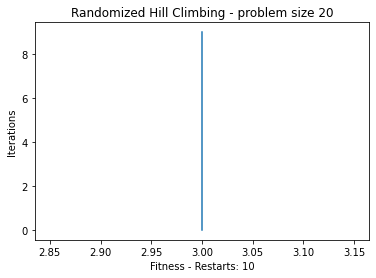

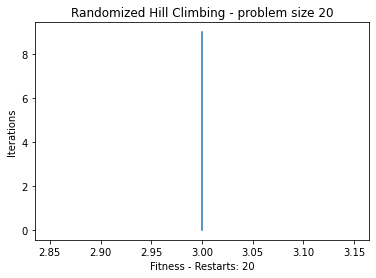

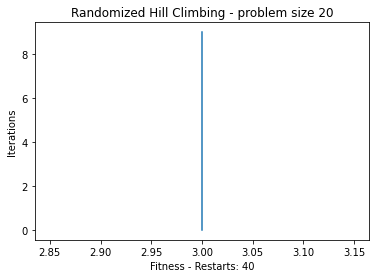

Done in 0.616 seconds


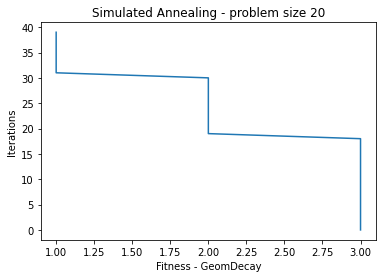

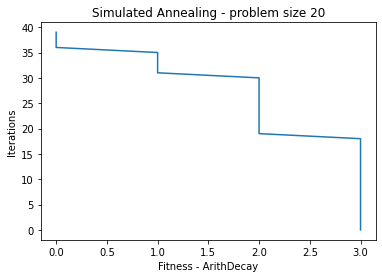

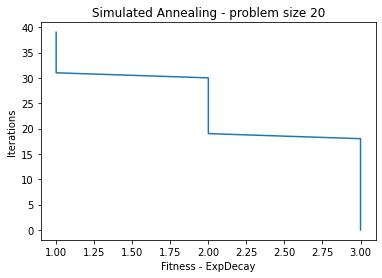

Done in 1 second(s)


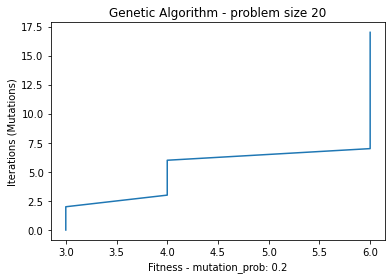

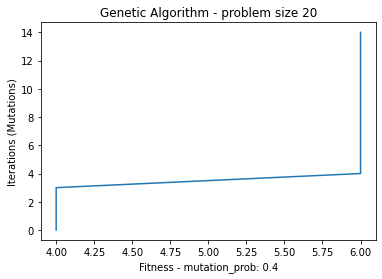

Done in 1 second(s)


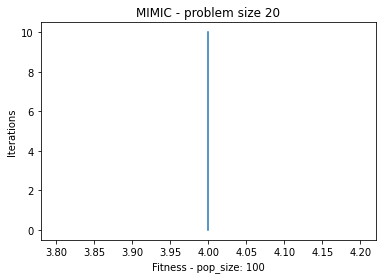

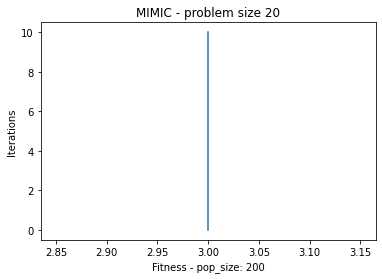

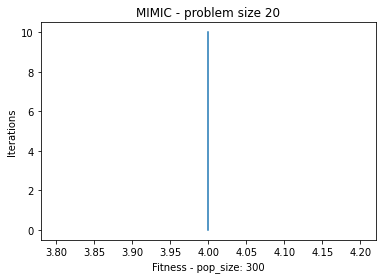

Done in 11 second(s)


In [5]:
print("Exploring Max-k color optimization problem") 
MaxKColor()

Exploring Knapsack optimization problem


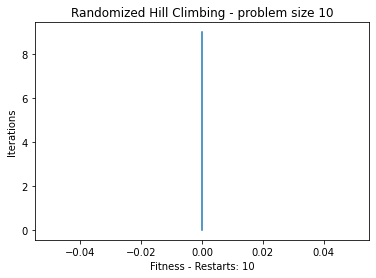

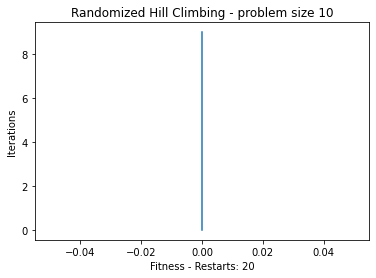

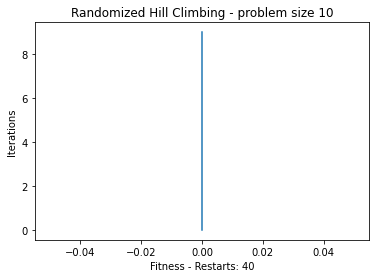

Done in 0.588 seconds


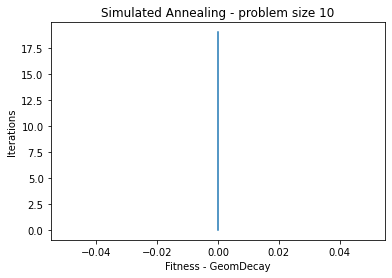

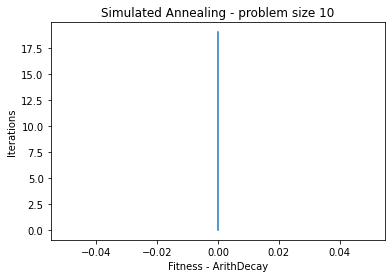

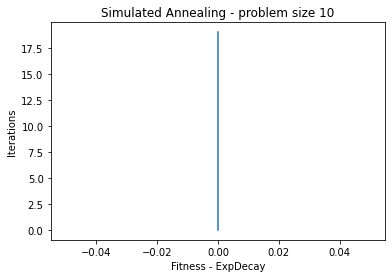

Done in 0.556 seconds


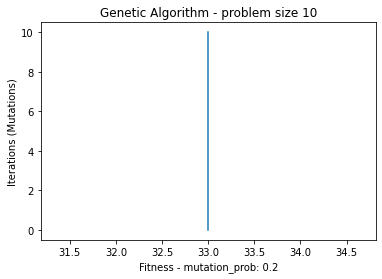

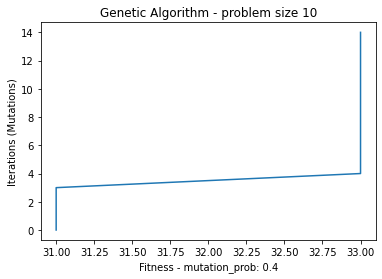

Done in 1 second(s)


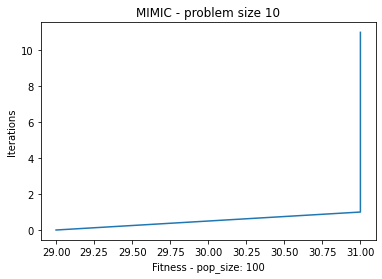

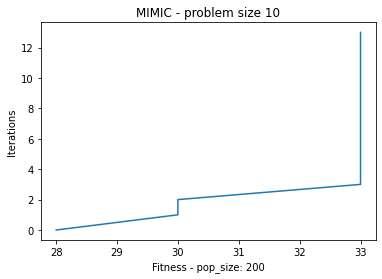

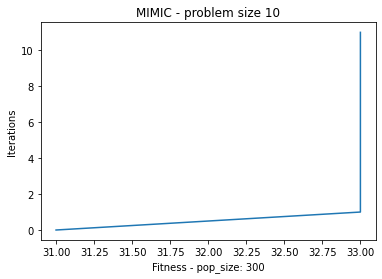

Done in 3 second(s)


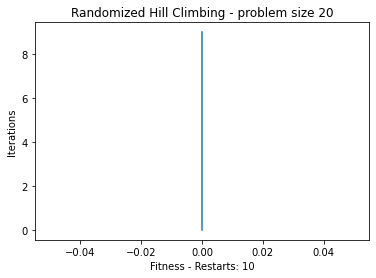

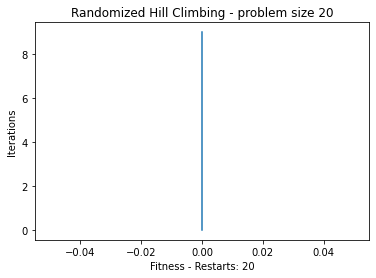

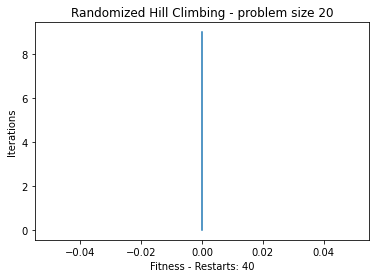

Done in 0.595 seconds


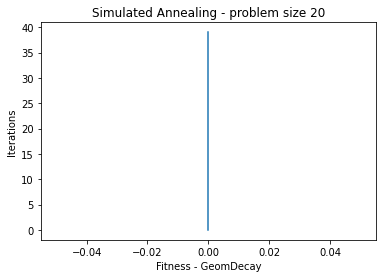

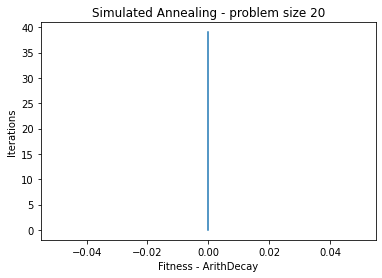

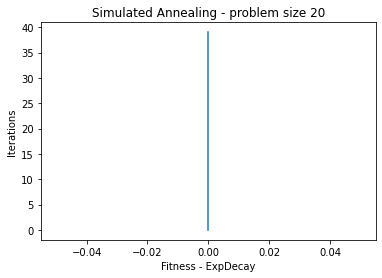

Done in 0.688 seconds


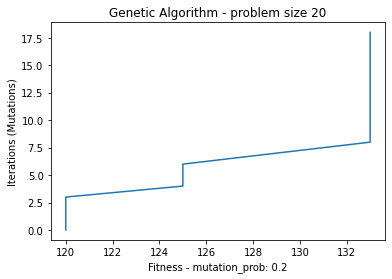

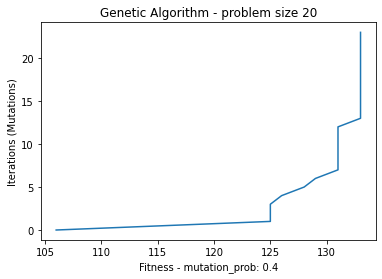

Done in 2 second(s)


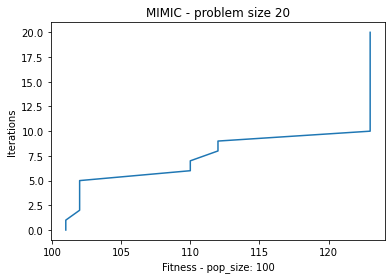

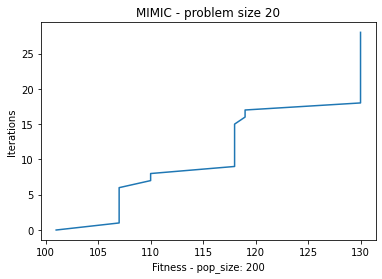

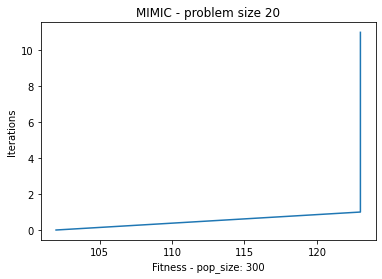

Done in 17 second(s)


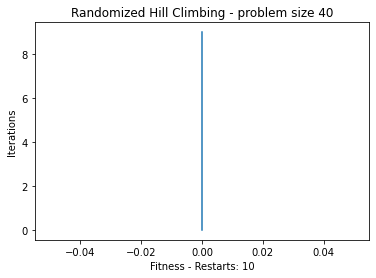

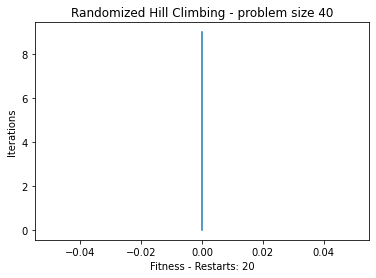

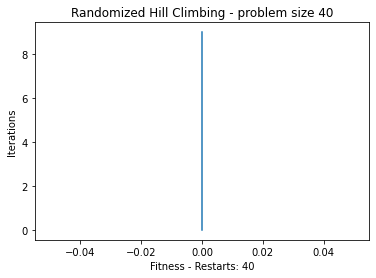

Done in 0.631 seconds


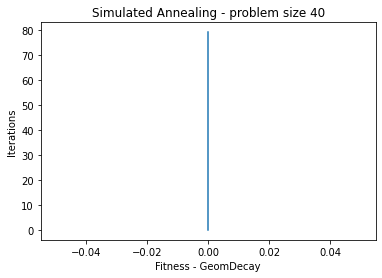

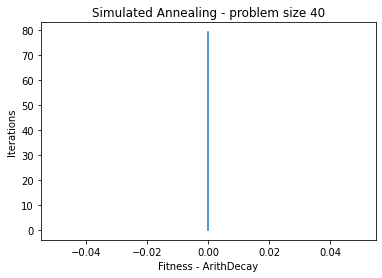

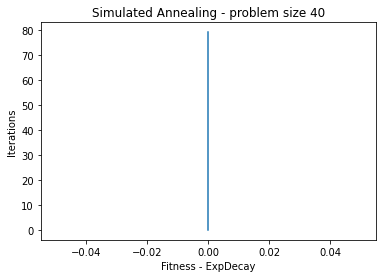

Done in 0.662 seconds


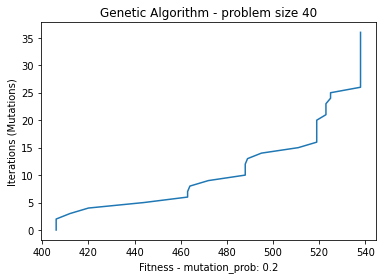

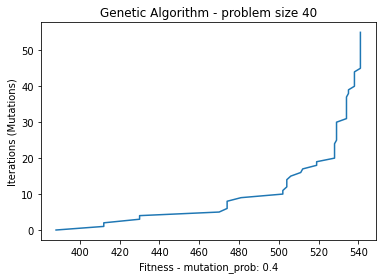

Done in 3 second(s)


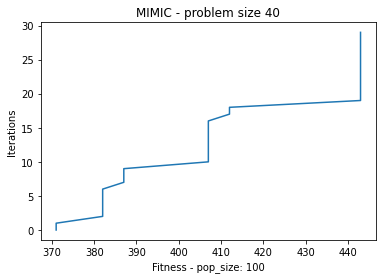

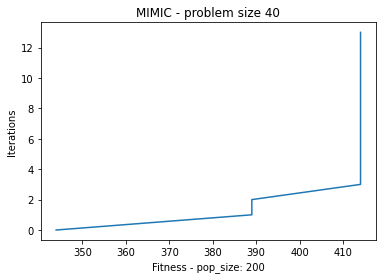

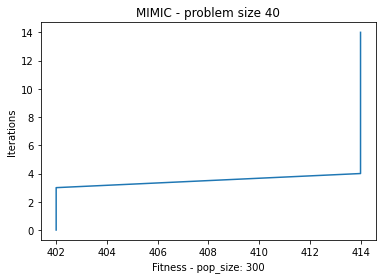

Done in 1 minute(s) and 0 second(s)


In [6]:
print("Exploring Knapsack optimization problem") 
Knapsack()